In [157]:
import numpy
import os, glob
import random
import tifffile
import json

from matplotlib import pyplot
from matplotlib_scalebar.scalebar import ScaleBar

folder = "pdk-nas"

In [158]:
files = glob.glob(f'/home-local2/projects/FLCDataset/scraping-{folder}/*.tif')
print(len(files))
metadata = json.load(open(f'/home-local2/projects/FLCDataset/scraping-{folder}/metadata.json', "r"))

5412


cs1_r7_t1-t3-t4_pixelsteps_Exc15_STED10.msr


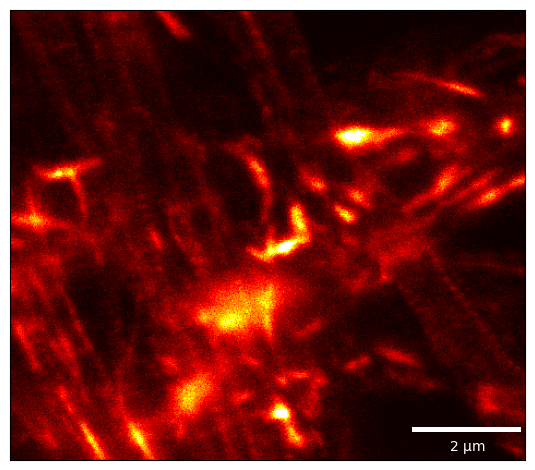

In [194]:
idx = random.randint(0, len(files) - 1)
file = files[idx]

image = tifffile.imread(file)
with tifffile.TiffFile(file) as tif:
    dx = [1/r for r in tif.pages[0].resolution]
    dx = [r * 1e-6 if r > 1 else r for r in dx]

key = os.path.splitext(os.path.basename(file))[0]
print(os.path.basename(metadata[key]["image-id"]))

fig, ax = pyplot.subplots(tight_layout=True)
fig.set_facecolor("none")
ax.imshow(image, cmap="hot", vmin=0, vmax=numpy.quantile(image, 0.999))
ax.set_facecolor(None)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
scalebar = ScaleBar(
    dx[0], "um", location='lower right', scale_loc='bottom', length_fraction=0.1, height_fraction=0.01, frameon=False,
    color="white", fixed_value=2
)
ax.add_artist(scalebar)
pyplot.show()